# 一、預言家模型
下圖中，可以發現預言家模型比上述的模型預測的更準確
預言家模型最厲害的地方，
就是用多條 Fourier Series，去擬合（fitting）
![Prophet forecast](https://www.finlab.tw/%E8%B6%85%E7%B0%A1%E5%96%AE-Machine-Learning-%E9%A0%90%E6%B8%AC%E8%82%A1%E5%83%B9/pp3.png)

[FB論文](https://peerj.com/preprints/3190.pdf)

In [0]:
!git clone https://github.com/koreal6803/Stocker.git
!pip install -r Stocker/requirements.txt

In [0]:
import warnings


### 去除煩人的 warrning
warnings.filterwarnings('ignore')

# 二、讀入台積電股價

In [2]:
import pandas as pd


### 讀入series
df = pd.read_csv('Stocker/price.csv', index_col='date', parse_dates=['date'])
price = df.squeeze()
price.head()

FileNotFoundError: ignored

squeeze就是將dataframe變成series的function

In [0]:
print(df)
print(df.squeeze)

# 三、創建Stocker

In [0]:
from Stocker.stocker import Stocker
tsmc = Stocker(price)

the stock Stocker Initialized. Data covers 2000-01-04 00:00:00 to 2018-08-21 00:00:00.


預測中期走勢

Predicted Price on 2018-11-19 00:00:00 = $237.44


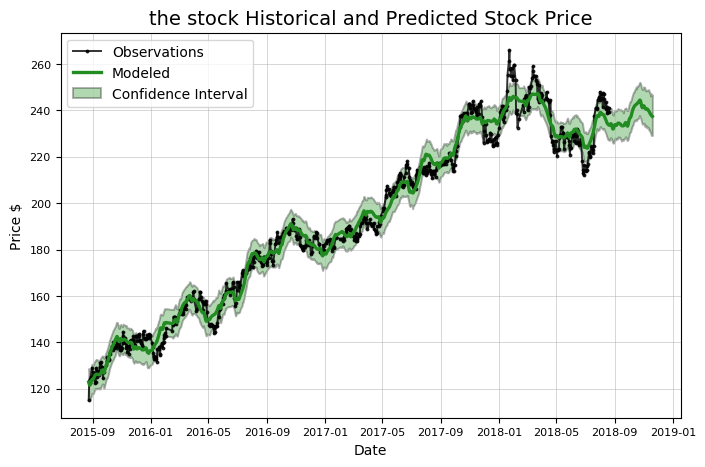

In [0]:
model, model_data = tsmc.create_prophet_model(days=90)

紅色虛線就是開始預測的當下

紅色線以後的時間都是預言家預測的結果

藍色為預測的真實股價

黃色則是信賴區間


Prediction Range: 2017-08-21 00:00:00 to 2018-08-21 00:00:00.

Predicted price on 2018-08-18 00:00:00 = $248.37.
Actual price on    2018-08-17 00:00:00 = $239.50.

Average Absolute Error on Training Data = $2.55.
Average Absolute Error on Testing  Data = $15.41.

When the model predicted an increase, the price increased 45.95% of the time.
When the model predicted a  decrease, the price decreased  42.27% of the time.

The actual value was within the 80% confidence interval 72.36% of the time.


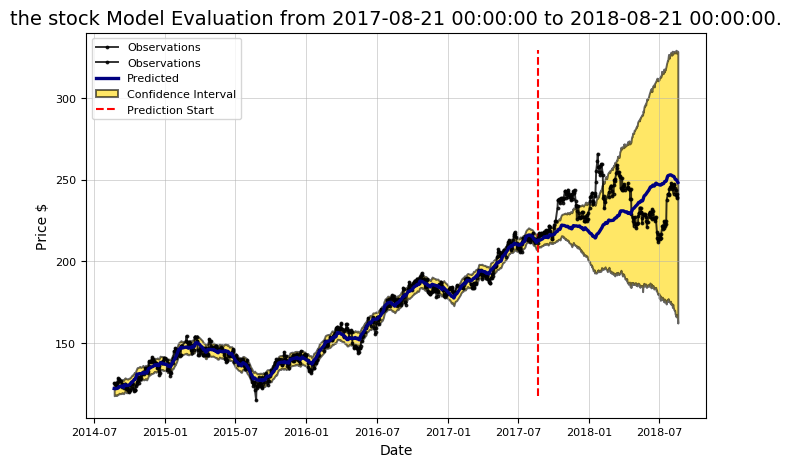

In [0]:
tsmc.evaluate_prediction()

藍色的線比較偏趨勢，不隨當下股價起舞，算是長期的趨勢預測

而黃色則是非常貼近股價，算是短期的預測

使用者可以自行調整參數，來決定短中長線的應用

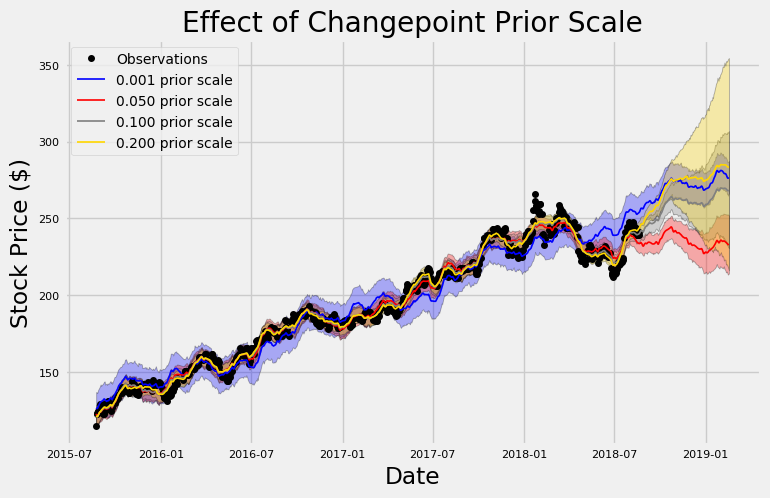

In [0]:
tsmc.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

# 四、拿來預測股價

藉由上述的參數枚舉，可以知道哪一個參數（changepoint_prior）是最好的，我們可以藉由執行predict_future 來預測股價


Predicted Increase: 

          Date    estimate    change       upper       lower
1   2018-08-22  244.637193  0.686234  249.404297  239.690363
2   2018-08-23  245.419203  0.782010  250.257004  240.182531
3   2018-08-24  246.085432  0.666229  250.980406  241.097887
5   2018-08-26  246.428856  0.343424  251.405882  241.611507
7   2018-08-28  246.427289  0.108304  251.570278  241.620386
8   2018-08-29  246.949894  0.522605  251.782046  242.123483
9   2018-08-30  247.818390  0.868496  252.690475  242.907381
10  2018-08-31  248.773709  0.955319  253.322292  243.877547
12  2018-09-02  250.148201  1.374492  255.202488  245.278144
13  2018-09-03  250.606249  0.458048  256.000706  245.763550
14  2018-09-04  251.085048  0.478798  256.284430  246.171260
15  2018-09-05  251.628185  0.543137  256.939701  246.520228
16  2018-09-06  252.177281  0.549097  257.497944  247.172387
17  2018-09-07  252.666211  0.488930  258.153426  247.479855
19  2018-09-09  253.538394  0.872183  258.875501  248.162017
2

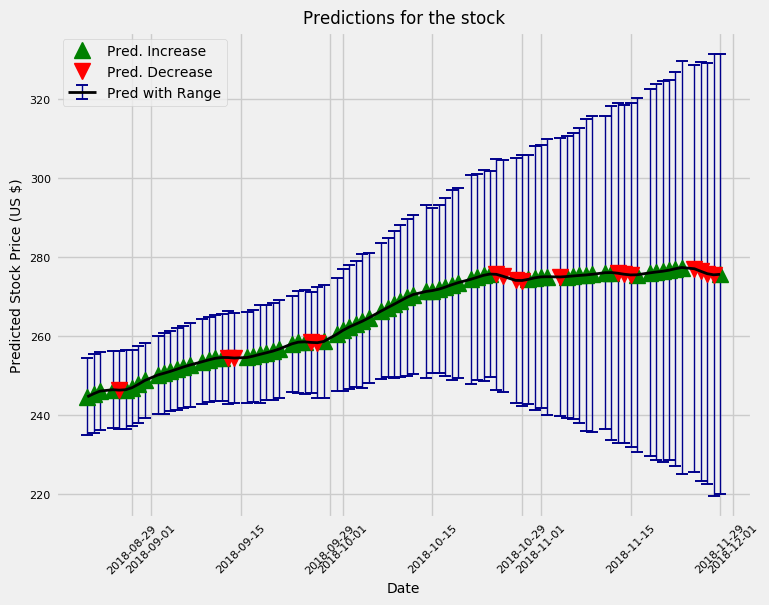

In [0]:
tsmc.predict_future(days=100)